# Research

## Imports

In [19]:
import pandas as pd
import pandas_datareader as dr
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime
import mplfinance as mpl
import plotly.graph_objects as go
import plotly
import yfinance as yf

## Data Import

In [2]:
df = pd.read_csv('data/data2.csv', index_col='Symbol')

## Sorting Data

In [3]:
df

,Name,Sector
Symbol,,
MMM,3M,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie,Health Care
ABMD,Abiomed,Health Care
ACN,Accenture,Information Technology
...,...,...
YUM,Yum! Brands,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


In [4]:
isInfoTech = df['Sector']== 'Information Technology'

In [5]:
print(isInfoTech.head())

Symbol
MMM     False
ABT     False
ABBV    False
ABMD    False
ACN      True
Name: Sector, dtype: bool


In [6]:
df_InfoTech = df[isInfoTech]

In [7]:
df_InfoTech

,Name,Sector
Symbol,,
ACN,Accenture,Information Technology
ADBE,Adobe,Information Technology
AMD,Advanced Micro Devices,Information Technology
AKAM,Akamai Technologies,Information Technology
APH,Amphenol Corp,Information Technology
...,...,...
V,Visa,Information Technology
WDC,Western Digital,Information Technology
WU,Western Union,Information Technology


## IBM INTEL NVIDIA

In [8]:
#looking at IBM,INTEL,NVIDIA,

In [9]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2021,6,22)

In [22]:
ibm  = yf.download("IBM",start, end)
intel = yf.download("INTC",start, end)
nvidia = yf.download("NVDA",start, end)
trch = yf.download("TRCH",start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
ibm.to_csv('IBM_STOCK.csv')
#ibm stock
intel.to_csv('INTC_STOCK.csv')
nvidia.to_csv('NVDA_STOCK.csv')
trch.to_csv('TRCH_STOCK.csv')

In [24]:
ibm.head()
trch.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-15,9.580000,12.3000,8.640000,10.14,10.14,132269053
2021-06-16,11.620000,13.5200,10.666000,11.98,11.98,93458342
2021-06-17,10.820000,11.1602,9.720000,10.80,10.80,32536444
2021-06-18,10.800000,13.0000,10.610000,12.54,12.54,37913896
2021-06-21,17.799999,21.7600,16.139999,19.84,19.84,201314576


In [25]:
intel.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,36.610001,36.930000,36.270000,36.599998,32.651402,20196500
2017-01-04,36.709999,36.770000,36.340000,36.410000,32.481903,15915700
2017-01-05,36.450001,36.720001,36.310001,36.349998,32.428375,13986000
2017-01-06,36.590000,36.680000,36.189999,36.480000,32.544357,15114000
2017-01-09,36.480000,36.889999,36.480000,36.610001,32.660336,19461400


In [26]:
nvidia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,26.1000,26.592501,24.844999,25.502501,25.178257,150199600
2017-01-04,25.8500,26.375000,25.382500,26.097500,25.765692,119922000
2017-01-05,26.1325,26.455000,25.262501,25.434999,25.111610,98429600
2017-01-06,25.7125,26.062500,25.299999,25.775000,25.447294,82285600
2017-01-09,25.8750,27.000000,25.875000,26.820000,26.479010,91624800


Text(0.5, 1.0, 'Stock Prices of IBM,Intel and Nvidia')

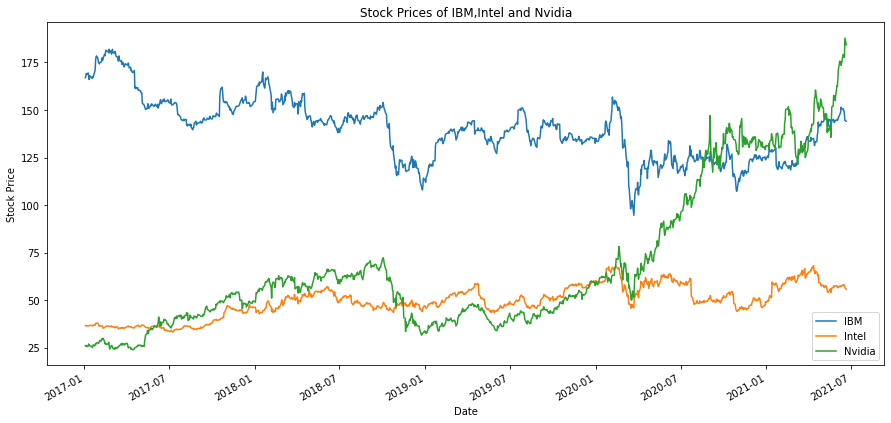

In [27]:
ibm['Open'].plot(label='IBM',figsize=(15,7))
intel['Open'].plot(label='Intel')
nvidia['Open'].plot(label='Nvidia')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Stock Prices of IBM,Intel and Nvidia')

## Volumes

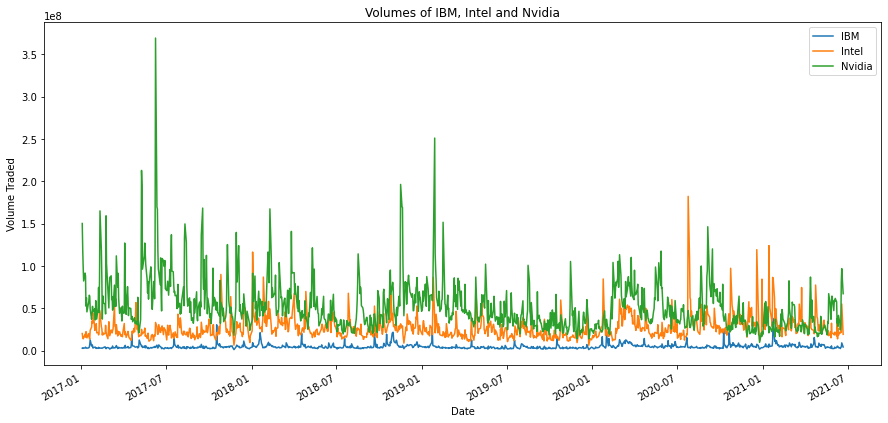

In [28]:
ibm['Volume'].plot(label='IBM',figsize=(15,7))
intel['Volume'].plot(label='Intel')
nvidia['Volume'].plot(label='Nvidia')
plt.ylabel('Volume Traded')
plt.title('Volumes of IBM, Intel and Nvidia')
plt.legend()

## Total Traded / ~Market Cap

In [29]:
ibm['Total Traded'] = ibm['Open'] * ibm['Volume']
intel['Total Traded'] = intel['Open'] * intel['Volume']
nvidia['Total Traded'] = nvidia['Open'] * nvidia['Volume']

Text(0.5, 1.0, 'Total Traded for IBM, Intel, and Nvidia')

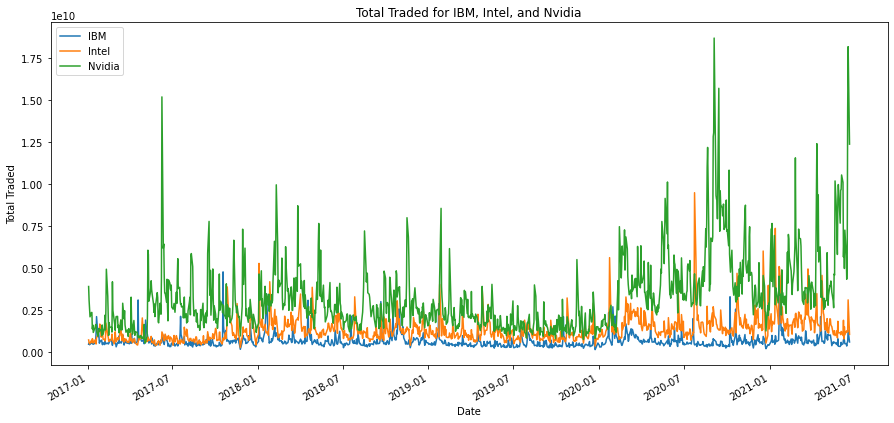

In [30]:
ibm['Total Traded'].plot(label=('IBM'),figsize=(15,7))
intel['Total Traded'].plot(label=('Intel'))
nvidia['Total Traded'].plot(label=('Nvidia'))
plt.ylabel('Total Traded')
plt.legend()
plt.title('Total Traded for IBM, Intel, and Nvidia')

## 50 and 200 Day Rolling EMA

Text(0.5, 1.0, 'Intel Open, 50EMA, 200EMA')

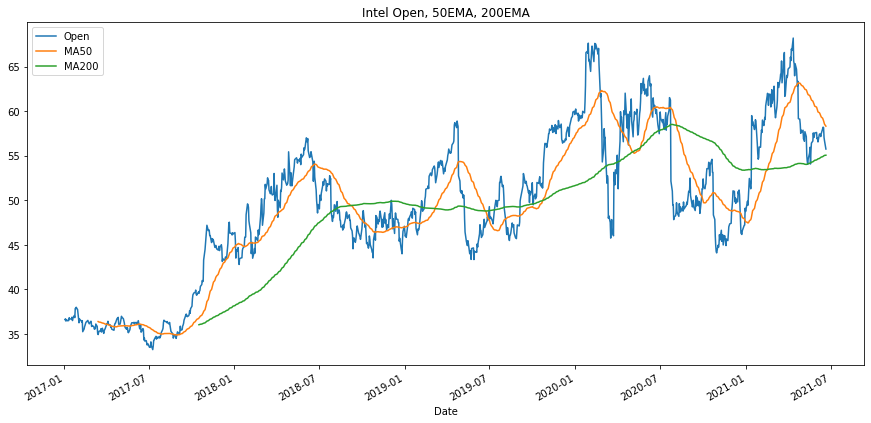

In [31]:
intel['Open'].plot(figsize=(15,7))
intel['MA50']=intel['Open'].rolling(50).mean()
intel['MA50'].plot(label='MA50')
intel['MA200']=intel['Open'].rolling(200).mean()
intel['MA200'].plot(label='MA200')
plt.legend()
plt.title('Intel Open, 50EMA, 200EMA')

Text(0.5, 1.0, 'IBM Open, 50EMA, 200EMA')

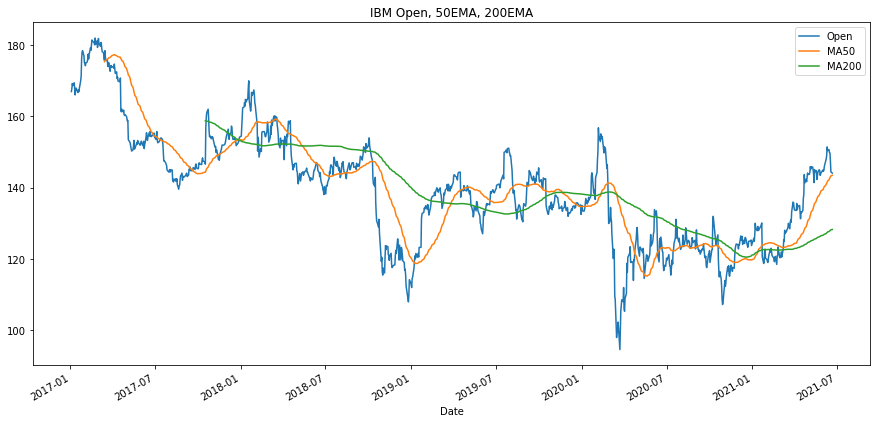

In [32]:
ibm['Open'].plot(figsize=(15,7))
ibm['MA50']=ibm['Open'].rolling(50).mean()
ibm['MA50'].plot(label='MA50')
ibm['MA200']=ibm['Open'].rolling(200).mean()
ibm['MA200'].plot(label='MA200')
plt.legend()
plt.title('IBM Open, 50EMA, 200EMA')

Text(0.5, 1.0, 'Nvidia Open, 50EMA, 200EMA')

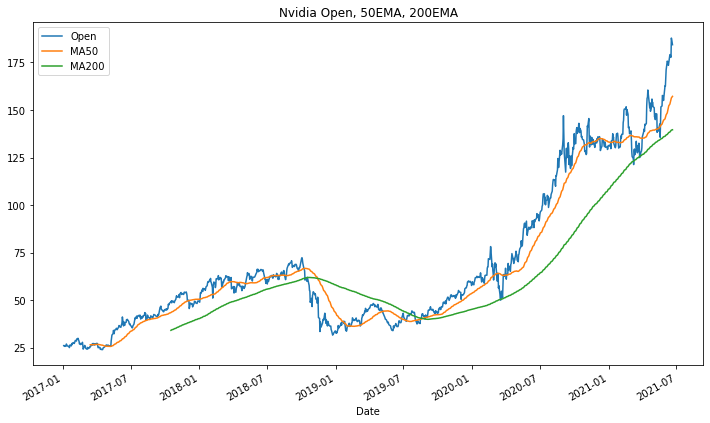

In [33]:
nvidia['Open'].plot(figsize=(12,7))
nvidia['MA50']=nvidia['Open'].rolling(50).mean()
nvidia['MA50'].plot(label='MA50')
nvidia['MA200']=nvidia['Open'].rolling(200).mean()
nvidia['MA200'].plot(label='MA200')
plt.legend()
plt.title('Nvidia Open, 50EMA, 200EMA')

Text(0.5, 1.0, 'Torchlight Open, 50EMA, 200EMA')

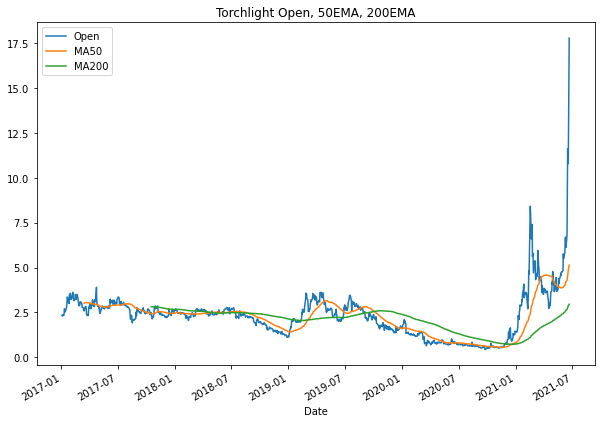

In [34]:
trch['Open'].plot(figsize=(10,7))
trch['MA50']=trch['Open'].rolling(50).mean()
trch['MA50'].plot(label='MA50')
trch['MA200']=trch['Open'].rolling(200).mean()
trch['MA200'].plot(label='MA200')
plt.legend()
plt.title('Torchlight Open, 50EMA, 200EMA')

## Time Series Analysis AutoCorrelation

In [35]:
def autocorr_daily(intel):
    
    returns = intel.pct_change()
    autocorrelation = returns['Adj Close'].autocorr()
    
    return autocorrelation

autocorr_daily(intel)

-0.223981103358745

In [36]:
autocorr_daily(ibm)

-0.10665048666602839

In [37]:
autocorr_daily(nvidia)

-0.1295881004491559

In [38]:
autocorr_daily(trch)

-0.018776463972155877

## Scatter Matrix Based off Open Price

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
tech_comp = pd.concat([ibm['Open'],intel['Open'],nvidia['Open']],axis =1)
tech_comp.columns = ['IBM Open','Intel Open','Nvidia Open']

In [ ]:
scatter_matrix(tech_comp,figsize=(8,8),hist_kwds={'bins':50})

CandleStick Analysis

## CandleStick Analysis

In [ ]:
candleIntel = intel.iloc[100:160]
mpl.plot(candleIntel,type='candle',volume=True)
candleIBM = ibm.iloc[100:160]
mpl.plot(candleIBM,type='candle',volume=True)
candleNvidia = nvidia.iloc[100:160]
mpl.plot(candleNvidia,type='candle',volume=True)

## Monte Carlo Stock Price Predictor

In [40]:
monte_end   = datetime.datetime.now()
monte_start = monte_end - datetime.timedelta(days=300)



prices = yf.download("NVDA",monte_start,monte_end)['Close']
returns = prices.pct_change()
meanReturns = returns.mean()

last_price = prices[-1]

num_sims = 100
num_days = 300

sim_df = pd.DataFrame()

for x in range(num_sims):
    count = 0
    daily_volatility = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0,daily_volatility))
    price_series.append(price)

    
    for y in range(num_days):
        if count == 299:
            break
        price = price_series[count] * (1 + np.random.normal(0,daily_volatility))
        price_series.append(price)
        count += 1
        
        sim_df[x] = pd.Series(price_series)
       


[*********************100%***********************]  1 of 1 completed


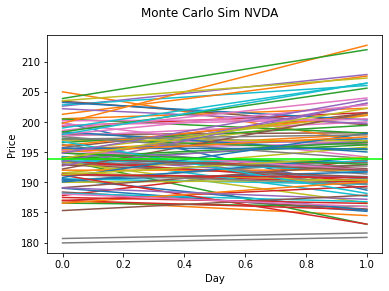

In [41]:
fig = plt.figure()
fig.suptitle('Monte Carlo Sim NVDA')
plt.plot(sim_df)
plt.axhline(y = last_price, color = 'lime',linestyle = '-')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


In [ ]:
import plotly_express as px
fig2 = px.line(sim_df)
fig2.show()


In [ ]:
pd.set_option('display.max_columns',100)

sim_df
sim_df.drop(index=1)

In [42]:
price_series

[197.93831067585865,
 206.4471578923522,
 207.31525312242627,
 206.28500226870335,
 199.74202081864925,
 205.12030830801655,
 206.40004138249571,
 210.49168872593555,
 220.14701097024962,
 218.4777090644725,
 205.48723248000164,
 200.4500183385234,
 205.1165224158686,
 210.75647622354975,
 212.01555801380994,
 214.3145155058608,
 226.0635584791522,
 229.81823750055483,
 228.14919106224642,
 216.75587319187792,
 212.8298227560497,
 213.42835955353164,
 206.70475363010323,
 204.97689506256893,
 200.72463628174626,
 199.37960847234402,
 200.19542568832995,
 196.47412154596623,
 198.37261654309958,
 196.87211637563937,
 199.67259734754634,
 194.64083914220288,
 191.71880338951235,
 189.98722576100633,
 184.40096508746043,
 189.1816855422015,
 191.91090356448552,
 190.9804780145821,
 191.42429801917706,
 193.01537171925227,
 200.73291857824873,
 207.16204604529864,
 207.90147584825803,
 207.39807150488735,
 214.69210380527952,
 212.94920668645327,
 220.87550175588194,
 225.57120579482213,
 